In [37]:
library(tidyverse)
library(magrittr)
library(purrr) 
library(glue) 
library(stringr) 

library(rvest) 
library(polite)
library(xml2) 

In [38]:
all_region_fire_incident <- read_html('https://www.fireandemergency.nz/incidents-and-news/incident-reports/')

In [39]:
north_region_href <- all_region_fire_incident %>%
   html_nodes('div.incidentreport__region:nth-child(6) .region .region__link') %>%
   html_attr('href') 
north_region_href

[1] "/incidents-and-news/incident-reports/incidents?region=1&day=Friday"   
[2] "/incidents-and-news/incident-reports/incidents?region=1&day=Thursday" 
[3] "/incidents-and-news/incident-reports/incidents?region=1&day=Wednesday"
[4] "/incidents-and-news/incident-reports/incidents?region=1&day=Tuesday"  
[5] "/incidents-and-news/incident-reports/incidents?region=1&day=Monday"   
[6] "/incidents-and-news/incident-reports/incidents?region=1&day=Sunday"   
[7] "/incidents-and-news/incident-reports/incidents?region=1&day=Saturday"

In [40]:
central_region_href <- all_region_fire_incident %>%
   html_nodes('div.incidentreport__region:nth-child(7) .region .region__link') %>%
   html_attr('href') 
central_region_href

[1] "/incidents-and-news/incident-reports/incidents?region=2&day=Friday"   
[2] "/incidents-and-news/incident-reports/incidents?region=2&day=Thursday" 
[3] "/incidents-and-news/incident-reports/incidents?region=2&day=Wednesday"
[4] "/incidents-and-news/incident-reports/incidents?region=2&day=Tuesday"  
[5] "/incidents-and-news/incident-reports/incidents?region=2&day=Monday"   
[6] "/incidents-and-news/incident-reports/incidents?region=2&day=Sunday"   
[7] "/incidents-and-news/incident-reports/incidents?region=2&day=Saturday"

In [41]:
south_region_href <- all_region_fire_incident %>%
   html_nodes('div.incidentreport__region:nth-child(8) .region .region__link') %>%
   html_attr('href') 
south_region_href

[1] "/incidents-and-news/incident-reports/incidents?region=3&day=Friday"   
[2] "/incidents-and-news/incident-reports/incidents?region=3&day=Thursday" 
[3] "/incidents-and-news/incident-reports/incidents?region=3&day=Wednesday"
[4] "/incidents-and-news/incident-reports/incidents?region=3&day=Tuesday"  
[5] "/incidents-and-news/incident-reports/incidents?region=3&day=Monday"   
[6] "/incidents-and-news/incident-reports/incidents?region=3&day=Sunday"   
[7] "/incidents-and-news/incident-reports/incidents?region=3&day=Saturday"

In [42]:
all_region_href <- tibble(North = north_region_href, Central = central_region_href, South = south_region_href)
all_region_href

North,Central,South
<chr>,<chr>,<chr>
/incidents-and-news/incident-reports/incidents?region=1&day=Friday,/incidents-and-news/incident-reports/incidents?region=2&day=Friday,/incidents-and-news/incident-reports/incidents?region=3&day=Friday
/incidents-and-news/incident-reports/incidents?region=1&day=Thursday,/incidents-and-news/incident-reports/incidents?region=2&day=Thursday,/incidents-and-news/incident-reports/incidents?region=3&day=Thursday
/incidents-and-news/incident-reports/incidents?region=1&day=Wednesday,/incidents-and-news/incident-reports/incidents?region=2&day=Wednesday,/incidents-and-news/incident-reports/incidents?region=3&day=Wednesday
/incidents-and-news/incident-reports/incidents?region=1&day=Tuesday,/incidents-and-news/incident-reports/incidents?region=2&day=Tuesday,/incidents-and-news/incident-reports/incidents?region=3&day=Tuesday
/incidents-and-news/incident-reports/incidents?region=1&day=Monday,/incidents-and-news/incident-reports/incidents?region=2&day=Monday,/incidents-and-news/incident-reports/incidents?region=3&day=Monday
/incidents-and-news/incident-reports/incidents?region=1&day=Sunday,/incidents-and-news/incident-reports/incidents?region=2&day=Sunday,/incidents-and-news/incident-reports/incidents?region=3&day=Sunday
/incidents-and-news/incident-reports/incidents?region=1&day=Saturday,/incidents-and-news/incident-reports/incidents?region=2&day=Saturday,/incidents-and-news/incident-reports/incidents?region=3&day=Saturday


In [43]:
install.packages('xts')
library(xts)

Installing package into ‘/home/christopher/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [44]:
region_incident_data <- function(href){
    
    region_data <- glue('https://www.fireandemergency.nz{href}#')%>%
                   read_html() %>%
                   html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(2) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                   html_text2()

    region_round_time <- strptime(region_data, "%d/%m/%Y %H:%M:%S")

    for(i in 1:length(region_round_time)){
        region_round_time[i] <- align.time(region_round_time[i], n=60*30
        )

    }
    
    return(region_round_time)
    
    }
    result <- region_incident_data("/incidents-and-news/incident-reports/incidents?region=1&day=Monday#")
    result
                  

 [1] "2022-10-10 01:00:00 NZDT" "2022-10-10 07:00:00 NZDT"
 [3] "2022-10-10 07:30:00 NZDT" "2022-10-10 07:30:00 NZDT"
 [5] "2022-10-10 07:30:00 NZDT" "2022-10-10 08:00:00 NZDT"
 [7] "2022-10-10 08:00:00 NZDT" "2022-10-10 08:00:00 NZDT"
 [9] "2022-10-10 08:00:00 NZDT" "2022-10-10 08:30:00 NZDT"
[11] "2022-10-10 08:30:00 NZDT" "2022-10-10 08:30:00 NZDT"
[13] "2022-10-10 09:00:00 NZDT" "2022-10-10 09:00:00 NZDT"
[15] "2022-10-10 09:30:00 NZDT" "2022-10-10 09:30:00 NZDT"
[17] "2022-10-10 09:30:00 NZDT" "2022-10-10 09:30:00 NZDT"
[19] "2022-10-10 10:00:00 NZDT" "2022-10-10 10:00:00 NZDT"
[21] "2022-10-10 10:00:00 NZDT" "2022-10-10 10:30:00 NZDT"
[23] "2022-10-10 10:30:00 NZDT" "2022-10-10 10:30:00 NZDT"
[25] "2022-10-10 10:30:00 NZDT" "2022-10-10 11:00:00 NZDT"
[27] "2022-10-10 11:00:00 NZDT" "2022-10-10 11:00:00 NZDT"
[29] "2022-10-10 11:30:00 NZDT" "2022-10-10 11:30:00 NZDT"
[31] "2022-10-10 11:30:00 NZDT" "2022-10-10 11:30:00 NZDT"
[33] "2022-10-10 11:30:00 NZDT" "2022-10-10 11:30:00 NZD

In [45]:
# this function return a data frame/tibble which contains all the data scraped from the fire incidents reports data
# this function takes id( characters indicating the region id; 1 being North, 2 being Central and 3 being South) and the day(string indicating the day of interest; e.g. Monday, Tuesday, etc)
region_incident_data <- function(id, day){
    
    region_href <- glue('https://www.fireandemergency.nz/incidents-and-news/incident-reports/incidents?region={id}&day={day}#')%>%
                   read_html() # first here we prepare the url which is the url for the page we want to scrape, then use read_html() function we scrape the data from the webpage and store the data in a variable
    # then from the scraped data which is the result from above code, we tried to categories the data we get and put the data in each category to their own varibale(performed below).


    Incident <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(1) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2()# so here we tried to get the data which tell us about incident number from the scrapped data and store it to variable
    
    Date_and_Time <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(2) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about date and time from the scrapped data and store it to variable

    Date_and_Time <- strptime(Date_and_Time, "%d/%m/%Y %H:%M:%S") #Date and time requires special treatment in our case, since we would like to runf the time to the nearest 30 minute, we have to change the data type from char to dttm(date and time). strptime() function allows us to do that

    # then here we tried to format it to nearest 30 minutes, we do it by looping through the date and time column
    for(i in 1:length(Date_and_Time)){
        Date_and_Time[i] <- align.time(Date_and_Time[i], n=60*30 # then by using align.time() function we make the time to nearest 30 minutes
        )

    }
    

    Location <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(3) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about location from the scrapped data and store it to variable
    
    Duration <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(4) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about duration from the scrapped data and store it to variable
    
    Station <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(5) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about fire station from the scrapped data and store it to variable
    
    Result <- region_href %>%
                  html_nodes(glue('.report__table .report__table__body .report__table__row:nth-child(6) .report__table__cell+ .report__table__cell--value p:nth-child(1)')) %>%
                  html_text2() #here we tried to get the data which tell us about result(which has result description and result code) from the scrapped data and store it to variable
    
    # then using the 
    region_incident_table <- tibble(Incident_no = Incident, Date_and_Time = Date_and_Time, Location = Location, Duration = Duration, Station = Station, Result = Result)
    
    return(region_incident_table)
    
    }

format:
{region}_{day}_data

### North fire incident data (Monday to Sunday)

In [46]:
north_monday_data <- region_incident_data("1", "Monday")
north_monday_data

Incident_no,Date_and_Time,Location,Duration,Station,Result
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>
F3575491,2022-10-10 01:00:00,MAEROA HAMILTON CITY,00:00:00,Te Rapa,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575529,2022-10-10 07:00:00,PAPAKURA AUCKLAND,00:08:09,Papakura,7100: FALSE ALARM (STRU)
F3575533,2022-10-10 07:30:00,TITIRANGI AUCKLAND,00:09:38,Titirangi,7100: FALSE ALARM (STRU)
F3575543,2022-10-10 07:30:00,PAPATOETOE AUCKLAND,00:00:00,Papatoetoe,"3100: RESCUE,EMERGENCY,MEDICAL CALL (RESC)"
F3575544,2022-10-10 07:30:00,REMUERA AUCKLAND,00:00:00,Remuera,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575545,2022-10-10 08:00:00,PARNELL AUCKLAND,00:11:23,Parnell,7100: FALSE ALARM (STRU)
F3575546,2022-10-10 08:00:00,TE AWAMUTU WAIPA DISTRICT,00:00:00,Te Awamutu,1500: MISCELLANEOUS FIRE (STRU)
F3575550,2022-10-10 08:00:00,ONERAHI WHANGAREI DISTRICT,00:00:00,Onerahi,9900: NON-FIRE EVENT: EXCL RESCUE/FALSE ALARM (MIN)
F3575554,2022-10-10 08:00:00,WESTGATE AUCKLAND,00:00:00,West Harbour,7100: FALSE ALARM (SPRNKLR)


In [47]:
north_tuesday_data <- region_incident_data("1", "Tuesday")

In [48]:
north_wednesday_data <- region_incident_data("1", "Wednesday")

In [49]:
north_thursday_data <- region_incident_data("1", "Thursday")

In [50]:
north_friday_data <- region_incident_data("1", "Friday")

In [51]:
north_saturday_data <- region_incident_data("1", "Saturday")

In [52]:
north_sunday_data <- region_incident_data("1", "Sunday")
north_sunday_data

Incident_no,Date_and_Time,Location,Duration,Station,Result
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>
F3575022,2022-10-09 00:30:00,AUCKLAND CENTRAL AUCKLAND,00:11:31,Auckland City,7100: FALSE ALARM (SPRNKLR)
F3575024,2022-10-09 01:00:00,WAINUI AUCKLAND,00:00:00,Silverdale,1200: MOBILE PROPERTY FIRE (MIN)
F3575026,2022-10-09 01:00:00,TE RAPA HAMILTON CITY,00:00:00,Te Rapa,7100: FALSE ALARM (SPRNKLR)
F3575030,2022-10-09 01:30:00,NUKUHAU TAUPO DISTRICT,03:21:28,Taupo,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MIN)"
F3575032,2022-10-09 01:30:00,MATAMATA MATAMATA-PIAKO DISTRICT,00:00:00,Matamata,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MIN)"
F3575034,2022-10-09 01:30:00,WHAKATANE WHAKATANE DISTRICT,00:00:00,Whakatane,1500: MISCELLANEOUS FIRE (MIN)
F3575036,2022-10-09 02:00:00,WHAKATANE WHAKATANE DISTRICT,00:00:00,Whakatane,1500: MISCELLANEOUS FIRE (MIN)
F3575039,2022-10-09 02:00:00,HILLPARK AUCKLAND,00:15:20,Manurewa,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575041,2022-10-09 02:00:00,TE ATATU SOUTH AUCKLAND,00:00:00,Te Atatu,9900: NON-FIRE EVENT: EXCL RESCUE/FALSE ALARM (MIN)


### Central fire incident data (Monday to Sunday)

In [53]:
central_monday_data <- region_incident_data("2", "Monday")

In [54]:
central_tuesday_data <- region_incident_data("2", "Tuesday")

In [55]:
central_wednesday_data <- region_incident_data("2", "Wednesday")

In [56]:
central_thursday_data <- region_incident_data("2", "Thursday")

In [57]:
central_friday_data <- region_incident_data("2", "Friday")

In [58]:
central_saturday_data <- region_incident_data("2", "Saturday")

In [59]:
central_sunday_data <- region_incident_data("2", "Sunday")

### South fire incident data (Monday to Sunday)

In [60]:
south_monday_data <- region_incident_data("3", "Monday")

In [61]:
south_tuesday_data <- region_incident_data("3", "Tuesday")

In [62]:
south_wednesday_data <- region_incident_data("3", "Wednesday")

In [63]:
south_thursday_data <- region_incident_data("3", "Thursday")

In [64]:
south_friday_data <- region_incident_data("3", "Friday")

In [65]:
south_saturday_data <- region_incident_data("3", "Saturday")

In [66]:
south_sunday_data <- region_incident_data("3", "Sunday")

## Merge all dataframe from Monday to Sunday into sngle one data frame

In [67]:
# this function return a tibble which consist of all fire incidents report in a certain region from one week ago from the current date
 # this function take one parameter which is region( a number in form of string which indicates what region we want to get the data from )
get_week_data <- function(region) {
    result_tibble <- tibble( # here we prepare the tibble, this tiblle is now empty but it will later be filled with data of fire incidents report in each day
        Incident_no = character(),
        Date_and_Time = date(),
        Location = character(),
        Duration= character(),
        Station = character(),
        Result = character()
    )
    temp <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday") 
    for(i in temp){
        result_tibble <- rbind(result_tibble, region_incident_data(region, i)) # here we loop through the day vectors which we prepare above, then using the region_incident_data() function we defined in previous section to fetch the fire incidents data for each day, then using rbind() function we can apppend the result_tiblle with each tibble we get from calling the region_incident_data() function
    }
    
    return(result_tibble) 
}

the_tibble <- get_week_data("2")
the_tibble

Incident_no,Date_and_Time,Location,Duration,Station,Result
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>
F3575487,2022-10-10 00:30:00,OPUNAKE SOUTH TARANAKI DISTRICT,00:00:00,Opunake,"3100: RESCUE,EMERGENCY,MEDICAL CALL (RESC)"
F3575492,2022-10-10 01:30:00,HIGHBURY PALMERSTON NORTH CITY,00:30:40,Palmerston North,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575505,2022-10-10 05:00:00,INGLEWOOD NEW PLYMOUTH DISTRICT,00:00:00,Inglewood,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MIN)"
F3575508,2022-10-10 05:30:00,LONGBURN PALMERSTON NORTH CITY,04:23:10,Palmerston North,1100: STRUCTURE FIRE (STRU)
F3575511,2022-10-10 05:30:00,MAREWA NAPIER CITY,00:00:00,Napier,1200: MOBILE PROPERTY FIRE (STRU)
F3575513,2022-10-10 05:30:00,WHANGANUI EAST WHANGANUI DISTRICT,00:55:36,Whanganui,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575519,2022-10-10 06:00:00,MARAENUI NAPIER CITY,00:00:00,Napier,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575520,2022-10-10 06:30:00,HUTT CENTRAL LOWER HUTT CITY,00:18:15,Seaview,7100: FALSE ALARM (STRU)
F3575534,2022-10-10 07:30:00,TARADALE NAPIER CITY,00:20:52,Napier,7100: FALSE ALARM (STRU)


## Seperate date and time columns. Also adding the new column for the day of the week

In [68]:
library(lubridate) # lubridate library have some functions that really useful for use especially when dealing when date and time

In [69]:
the_tibble <- the_tibble %>% mutate(Date = date(Date_and_Time)) %>% mutate(Time = format(Date_and_Time, format = "%H:%M:%S"))# here we created 2 new columns, one for date and one for time. We seperate the date and time so that the data frame look more tidy and presentable for the user. It is also so that we can easily import it to the tableu
the_tibble

Incident_no,Date_and_Time,Location,Duration,Station,Result,Date,Time
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>
F3575487,2022-10-10 00:30:00,OPUNAKE SOUTH TARANAKI DISTRICT,00:00:00,Opunake,"3100: RESCUE,EMERGENCY,MEDICAL CALL (RESC)",2022-10-10,00:30:00
F3575492,2022-10-10 01:30:00,HIGHBURY PALMERSTON NORTH CITY,00:30:40,Palmerston North,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)",2022-10-10,01:30:00
F3575505,2022-10-10 05:00:00,INGLEWOOD NEW PLYMOUTH DISTRICT,00:00:00,Inglewood,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MIN)",2022-10-10,05:00:00
F3575508,2022-10-10 05:30:00,LONGBURN PALMERSTON NORTH CITY,04:23:10,Palmerston North,1100: STRUCTURE FIRE (STRU),2022-10-10,05:30:00
F3575511,2022-10-10 05:30:00,MAREWA NAPIER CITY,00:00:00,Napier,1200: MOBILE PROPERTY FIRE (STRU),2022-10-10,05:30:00
F3575513,2022-10-10 05:30:00,WHANGANUI EAST WHANGANUI DISTRICT,00:55:36,Whanganui,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)",2022-10-10,05:30:00
F3575519,2022-10-10 06:00:00,MARAENUI NAPIER CITY,00:00:00,Napier,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)",2022-10-10,06:00:00
F3575520,2022-10-10 06:30:00,HUTT CENTRAL LOWER HUTT CITY,00:18:15,Seaview,7100: FALSE ALARM (STRU),2022-10-10,06:30:00
F3575534,2022-10-10 07:30:00,TARADALE NAPIER CITY,00:20:52,Napier,7100: FALSE ALARM (STRU),2022-10-10,07:30:00


## Seperate the result code and the sesult description into 2 columns

In [70]:
get_result_code <- function(result){
    splitted_result <- strsplit(result, split=":")
    result_list <- vector(mode = "list", len = 0)
    for(i in splitted_result){
        result_list<- append(result_list, i[1])
    }
    return(result_list)
}

get_result_desc <- function(result){
    splitted_result <- strsplit(result, split=":")
    desc_list <- vector(mode = "list", len = 0)
    for(i in splitted_result){
        desc = ""
        for(ind in seq_along(i)){

            if(ind != 1) {
                desc <- glue(desc,i[[ind]])
            }
        }

        desc_list <- append(desc_list, desc)
    }
    
    return(desc_list)
}


the_tibble <- the_tibble %>% mutate(Result_code = get_result_code(Result)) %>% mutate(Result_Description = get_result_desc(Result)) %>% mutate(across(Result_Description, as.character)) %>% mutate(Day = wday(Date_and_Time, label = TRUE))
the_tibble




Incident_no,Date_and_Time,Location,Duration,Station,Result,Date,Time,Result_code,Result_Description,Day
<chr>,<dttm>,<chr>,<chr>,<chr>,<chr>,<date>,<chr>,<list>,<chr>,<ord>
F3575487,2022-10-10 00:30:00,OPUNAKE SOUTH TARANAKI DISTRICT,00:00:00,Opunake,"3100: RESCUE,EMERGENCY,MEDICAL CALL (RESC)",2022-10-10,00:30:00,3100,"RESCUE,EMERGENCY,MEDICAL CALL (RESC)",Mon
F3575492,2022-10-10 01:30:00,HIGHBURY PALMERSTON NORTH CITY,00:30:40,Palmerston North,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)",2022-10-10,01:30:00,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)",Mon
F3575505,2022-10-10 05:00:00,INGLEWOOD NEW PLYMOUTH DISTRICT,00:00:00,Inglewood,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MIN)",2022-10-10,05:00:00,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MIN)",Mon
F3575508,2022-10-10 05:30:00,LONGBURN PALMERSTON NORTH CITY,04:23:10,Palmerston North,1100: STRUCTURE FIRE (STRU),2022-10-10,05:30:00,1100,STRUCTURE FIRE (STRU),Mon
F3575511,2022-10-10 05:30:00,MAREWA NAPIER CITY,00:00:00,Napier,1200: MOBILE PROPERTY FIRE (STRU),2022-10-10,05:30:00,1200,MOBILE PROPERTY FIRE (STRU),Mon
F3575513,2022-10-10 05:30:00,WHANGANUI EAST WHANGANUI DISTRICT,00:55:36,Whanganui,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)",2022-10-10,05:30:00,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)",Mon
F3575519,2022-10-10 06:00:00,MARAENUI NAPIER CITY,00:00:00,Napier,"3100: RESCUE,EMERGENCY,MEDICAL CALL (MED)",2022-10-10,06:00:00,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)",Mon
F3575520,2022-10-10 06:30:00,HUTT CENTRAL LOWER HUTT CITY,00:18:15,Seaview,7100: FALSE ALARM (STRU),2022-10-10,06:30:00,7100,FALSE ALARM (STRU),Mon
F3575534,2022-10-10 07:30:00,TARADALE NAPIER CITY,00:20:52,Napier,7100: FALSE ALARM (STRU),2022-10-10,07:30:00,7100,FALSE ALARM (STRU),Mon


## Tidy up the data

#### dropping unecessary columns

In [71]:
the_tibble <- the_tibble %>% select(Incident_no,Day, Date, Time, Duration, Location, Station, Result_code, Result_Description)
the_tibble

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<ord>,<date>,<chr>,<chr>,<chr>,<chr>,<list>,<chr>
F3575487,Mon,2022-10-10,00:30:00,00:00:00,OPUNAKE SOUTH TARANAKI DISTRICT,Opunake,3100,"RESCUE,EMERGENCY,MEDICAL CALL (RESC)"
F3575492,Mon,2022-10-10,01:30:00,00:30:40,HIGHBURY PALMERSTON NORTH CITY,Palmerston North,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575505,Mon,2022-10-10,05:00:00,00:00:00,INGLEWOOD NEW PLYMOUTH DISTRICT,Inglewood,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MIN)"
F3575508,Mon,2022-10-10,05:30:00,04:23:10,LONGBURN PALMERSTON NORTH CITY,Palmerston North,1100,STRUCTURE FIRE (STRU)
F3575511,Mon,2022-10-10,05:30:00,00:00:00,MAREWA NAPIER CITY,Napier,1200,MOBILE PROPERTY FIRE (STRU)
F3575513,Mon,2022-10-10,05:30:00,00:55:36,WHANGANUI EAST WHANGANUI DISTRICT,Whanganui,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575519,Mon,2022-10-10,06:00:00,00:00:00,MARAENUI NAPIER CITY,Napier,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575520,Mon,2022-10-10,06:30:00,00:18:15,HUTT CENTRAL LOWER HUTT CITY,Seaview,7100,FALSE ALARM (STRU)
F3575534,Mon,2022-10-10,07:30:00,00:20:52,TARADALE NAPIER CITY,Napier,7100,FALSE ALARM (STRU)


In [72]:
the_tibble <- the_tibble  %>% mutate(across(Result_code, as.integer)) %>% mutate(across(Day, as.character)) 
the_tibble

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3575487,Mon,2022-10-10,00:30:00,00:00:00,OPUNAKE SOUTH TARANAKI DISTRICT,Opunake,3100,"RESCUE,EMERGENCY,MEDICAL CALL (RESC)"
F3575492,Mon,2022-10-10,01:30:00,00:30:40,HIGHBURY PALMERSTON NORTH CITY,Palmerston North,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575505,Mon,2022-10-10,05:00:00,00:00:00,INGLEWOOD NEW PLYMOUTH DISTRICT,Inglewood,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MIN)"
F3575508,Mon,2022-10-10,05:30:00,04:23:10,LONGBURN PALMERSTON NORTH CITY,Palmerston North,1100,STRUCTURE FIRE (STRU)
F3575511,Mon,2022-10-10,05:30:00,00:00:00,MAREWA NAPIER CITY,Napier,1200,MOBILE PROPERTY FIRE (STRU)
F3575513,Mon,2022-10-10,05:30:00,00:55:36,WHANGANUI EAST WHANGANUI DISTRICT,Whanganui,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575519,Mon,2022-10-10,06:00:00,00:00:00,MARAENUI NAPIER CITY,Napier,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575520,Mon,2022-10-10,06:30:00,00:18:15,HUTT CENTRAL LOWER HUTT CITY,Seaview,7100,FALSE ALARM (STRU)
F3575534,Mon,2022-10-10,07:30:00,00:20:52,TARADALE NAPIER CITY,Napier,7100,FALSE ALARM (STRU)


## Finding out the missing data

In [73]:
library(visdat)

Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.”


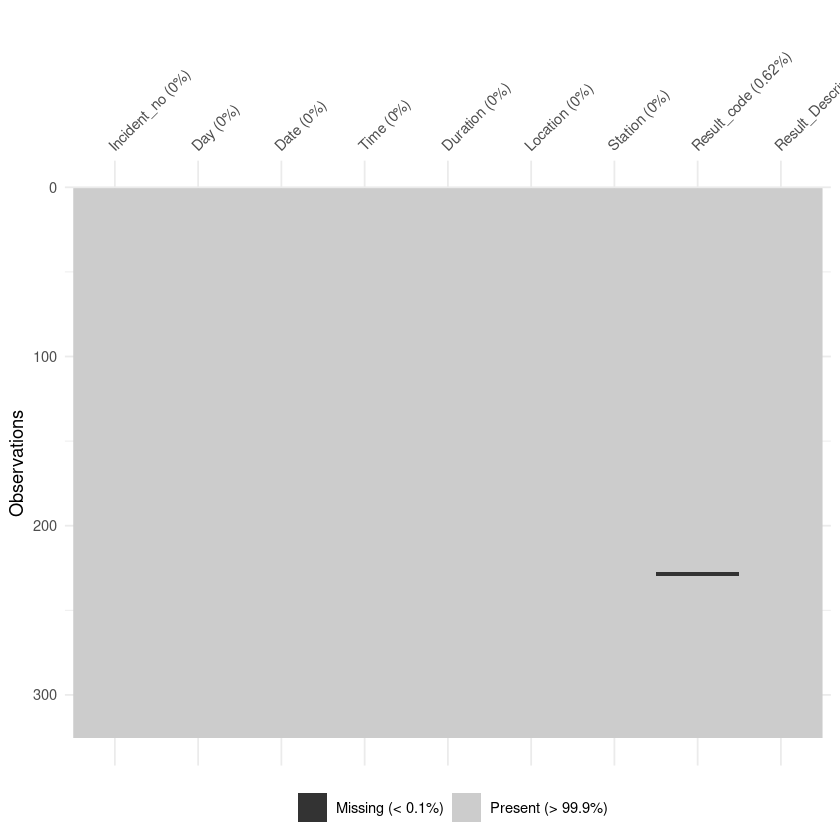

In [74]:
check_tibble <- the_tibble %>% vis_miss()
check_tibble

## Make empty string in Result Description to show NA insteas of an empty string

In [75]:
the_tibble <- mutate_all(the_tibble, list(~na_if(.,"")))
the_tibble

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3575487,Mon,2022-10-10,00:30:00,00:00:00,OPUNAKE SOUTH TARANAKI DISTRICT,Opunake,3100,"RESCUE,EMERGENCY,MEDICAL CALL (RESC)"
F3575492,Mon,2022-10-10,01:30:00,00:30:40,HIGHBURY PALMERSTON NORTH CITY,Palmerston North,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575505,Mon,2022-10-10,05:00:00,00:00:00,INGLEWOOD NEW PLYMOUTH DISTRICT,Inglewood,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MIN)"
F3575508,Mon,2022-10-10,05:30:00,04:23:10,LONGBURN PALMERSTON NORTH CITY,Palmerston North,1100,STRUCTURE FIRE (STRU)
F3575511,Mon,2022-10-10,05:30:00,00:00:00,MAREWA NAPIER CITY,Napier,1200,MOBILE PROPERTY FIRE (STRU)
F3575513,Mon,2022-10-10,05:30:00,00:55:36,WHANGANUI EAST WHANGANUI DISTRICT,Whanganui,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575519,Mon,2022-10-10,06:00:00,00:00:00,MARAENUI NAPIER CITY,Napier,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575520,Mon,2022-10-10,06:30:00,00:18:15,HUTT CENTRAL LOWER HUTT CITY,Seaview,7100,FALSE ALARM (STRU)
F3575534,Mon,2022-10-10,07:30:00,00:20:52,TARADALE NAPIER CITY,Napier,7100,FALSE ALARM (STRU)


## Automate the whole things
### the goal of this function is to have on function that will call any other related function which used to produce desired data

In [76]:
#this function returns a dataframe about the fire incidents called in a week( from Monday to Sunday)
#this function take region(characters) to indicate what region we want to get the data
#1 = North, 2 = Central, 3 = South
get_fire_incidents_data_in_a_week <- function(region) {
    the_tibble <- tibble(
        Incident_no = character(),
        Date_and_Time = date(),
        Location = character(),
        Duration= character(),
        Station = character(),
        Result = character()
    )
    temp <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
    for(i in temp){
        the_tibble <- rbind(the_tibble, region_incident_data(region, i))
    }

    the_tibble <- the_tibble %>% mutate(Date = date(Date_and_Time)) %>% mutate(Time = format(Date_and_Time, format = "%H:%M:%S"))
    
    
    the_tibble <- the_tibble %>% mutate(Result_code = get_result_code(Result)) %>% mutate(Result_Description = get_result_desc(Result)) %>% mutate(across(Result_Description, as.character)) %>% mutate(Day = wday(Date_and_Time, label = TRUE))


    the_tibble <- the_tibble %>% select(Incident_no,Day, Date, Time, Duration, Location, Station, Result_code, Result_Description)

    the_tibble <- the_tibble  %>% mutate(across(Result_code, as.integer)) %>% mutate(across(Day, as.character)) 

    the_tibble <- mutate_all(the_tibble, list(~na_if(.,"")))
    
    return(the_tibble)
}

north_region_data <- get_fire_incidents_data_in_a_week("1")
north_region_data
central_region_data <- get_fire_incidents_data_in_a_week("2")
central_region_data
south_region_data <- get_fire_incidents_data_in_a_week("3")
south_region_data

Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3575491,Mon,2022-10-10,01:00:00,00:00:00,MAEROA HAMILTON CITY,Te Rapa,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575529,Mon,2022-10-10,07:00:00,00:08:09,PAPAKURA AUCKLAND,Papakura,7100,FALSE ALARM (STRU)
F3575533,Mon,2022-10-10,07:30:00,00:09:38,TITIRANGI AUCKLAND,Titirangi,7100,FALSE ALARM (STRU)
F3575543,Mon,2022-10-10,07:30:00,00:00:00,PAPATOETOE AUCKLAND,Papatoetoe,3100,"RESCUE,EMERGENCY,MEDICAL CALL (RESC)"
F3575544,Mon,2022-10-10,07:30:00,00:00:00,REMUERA AUCKLAND,Remuera,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575545,Mon,2022-10-10,08:00:00,00:11:23,PARNELL AUCKLAND,Parnell,7100,FALSE ALARM (STRU)
F3575546,Mon,2022-10-10,08:00:00,00:00:00,TE AWAMUTU WAIPA DISTRICT,Te Awamutu,1500,MISCELLANEOUS FIRE (STRU)
F3575550,Mon,2022-10-10,08:00:00,00:00:00,ONERAHI WHANGAREI DISTRICT,Onerahi,9900,NON-FIRE EVENT EXCL RESCUE/FALSE ALARM (MIN)
F3575554,Mon,2022-10-10,08:00:00,00:00:00,WESTGATE AUCKLAND,West Harbour,7100,FALSE ALARM (SPRNKLR)


Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3575487,Mon,2022-10-10,00:30:00,00:00:00,OPUNAKE SOUTH TARANAKI DISTRICT,Opunake,3100,"RESCUE,EMERGENCY,MEDICAL CALL (RESC)"
F3575492,Mon,2022-10-10,01:30:00,00:30:40,HIGHBURY PALMERSTON NORTH CITY,Palmerston North,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575505,Mon,2022-10-10,05:00:00,00:00:00,INGLEWOOD NEW PLYMOUTH DISTRICT,Inglewood,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MIN)"
F3575508,Mon,2022-10-10,05:30:00,04:23:10,LONGBURN PALMERSTON NORTH CITY,Palmerston North,1100,STRUCTURE FIRE (STRU)
F3575511,Mon,2022-10-10,05:30:00,00:00:00,MAREWA NAPIER CITY,Napier,1200,MOBILE PROPERTY FIRE (STRU)
F3575513,Mon,2022-10-10,05:30:00,00:55:36,WHANGANUI EAST WHANGANUI DISTRICT,Whanganui,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575519,Mon,2022-10-10,06:00:00,00:00:00,MARAENUI NAPIER CITY,Napier,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575520,Mon,2022-10-10,06:30:00,00:18:15,HUTT CENTRAL LOWER HUTT CITY,Seaview,7100,FALSE ALARM (STRU)
F3575534,Mon,2022-10-10,07:30:00,00:20:52,TARADALE NAPIER CITY,Napier,7100,FALSE ALARM (STRU)


Incident_no,Day,Date,Time,Duration,Location,Station,Result_code,Result_Description
<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
F3575494,Mon,2022-10-10,02:00:00,00:21:18,BURNSIDE CHRISTCHURCH CITY,Christchurch City,7100,FALSE ALARM (STRU)
F3575495,Mon,2022-10-10,02:30:00,00:23:18,DUNEDIN CENTRAL DUNEDIN CITY,Dunedin,9900,NON-FIRE EVENT EXCL RESCUE/FALSE ALARM (STRU)
F3575498,Mon,2022-10-10,04:00:00,00:00:00,PORTAGE MARLBOROUGH DISTRICT,Sounds,1500,MISCELLANEOUS FIRE (MIN)
F3575501,Mon,2022-10-10,04:30:00,00:16:53,CHRISTCHURCH CENTRAL CHRISTCHURCH CITY,Christchurch City,7100,FALSE ALARM (SPRNKLR)
F3575503,Mon,2022-10-10,05:00:00,00:27:34,ALLENTON ASHBURTON DISTRICT,Ashburton,3100,"RESCUE,EMERGENCY,MEDICAL CALL (MED)"
F3575517,Mon,2022-10-10,06:00:00,00:14:36,MAIREHAU CHRISTCHURCH CITY,Christchurch City,1500,MISCELLANEOUS FIRE (MIN)
F3575537,Mon,2022-10-10,07:30:00,00:00:00,NORTH DUNEDIN DUNEDIN CITY,Dunedin,1400,"CHEMICAL, FLAMMABLE LIQUID, GAS FIRE (HAZGAS)"
F3575539,Mon,2022-10-10,07:30:00,00:18:13,HARGEST INVERCARGILL CITY,Invercargill,9900,NON-FIRE EVENT EXCL RESCUE/FALSE ALARM (MIN)
F3575547,Mon,2022-10-10,08:00:00,00:00:00,HORNBY SOUTH CHRISTCHURCH CITY,Wigram,1500,MISCELLANEOUS FIRE (STRU)
